In [22]:
import urllib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv(r'ouvidoria-aneel-2024.csv', sep=';', encoding='latin1')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499203 entries, 0 to 499202
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   DatGeracaoConjuntoDados  499203 non-null  object
 1   SigAgente                499203 non-null  object
 2   NumCPFCNPJAgente         499203 non-null  int64 
 3   SigUF                    499203 non-null  object
 4   CodigoMunicipio          499203 non-null  int64 
 5   NomMunicipio             499203 non-null  object
 6   NomCategoria             499203 non-null  object
 7   NomSubCategoria          499203 non-null  object
 8   NomTipologia             499203 non-null  object
 9   NomDecisao               499203 non-null  object
 10  DscSituacao              499203 non-null  object
 11  DtCriacao                499203 non-null  object
 12  NumQtdReclamacoesDia     499203 non-null  int64 
dtypes: int64(3), object(10)
memory usage: 49.5+ MB


In [1]:
df

NameError: name 'df' is not defined

In [25]:
df['SigUF'].unique(), len(df['SigUF'].unique())

(array(['RO', 'MA', 'PR', 'MG', 'AC', 'RS', 'MT', 'RN', 'AM', 'SC', 'BA',
        'SP', 'RR', 'PB', 'CE', 'PA', 'AL', 'TO', 'PE', 'MS', 'RJ', 'AP',
        'PI', 'ES', 'GO', 'SE', 'DF'], dtype=object),
 27)

In [26]:
df['NomCategoria'].unique(), len(df['NomCategoria'].unique())

(array(['Informação', 'Reclamações', 'Denúncias', 'Sugestão/Crítica',
        'Elogio'], dtype=object),
 5)

In [27]:
df['NomSubCategoria'].unique(), len(df['NomSubCategoria'].unique())

(array(['Serviços Técnicos', 'Faturamento', 'Qualidade do Fornecimento',
        'Serviços Comerciais', 'Cobranças', 'Outros', 'Atendimento',
        'Denúncias', 'Sugestão/Crítica', 'Elogio'], dtype=object),
 10)

In [28]:
df['NomTipologia'].unique(), len(df['NomTipologia'].unique())

(array(['Poda de Árvore', 'Class UC Baixa Renda', 'Oscilação de Tensão',
        'Falta de Energia', 'Fatur por Média', 'Fatur Microgeração',
        'Devol Antecipação Obras', 'Ligação', 'Conexão Microgeração',
        'Relocação Poste/Rede', 'Tarifas de Energia',
        'Cobrança Irregularidades', 'Débitos Anteriores',
        'Variação de Consumo', 'Iluminação Pública', 'Religação',
        'Devol Valores', 'Alteração Cadastral', 'Alteração de carga',
        'Aferição Medidor', 'Dificuldade Pagamento',
        'Nenhuma das Anteriores', 'Cobrança Indevida', '2ª Via Fatura',
        'Interrup Frequentes', 'Subst Equipamento Rede',
        'Atend Presencial', 'Poste em Mau Estado', 'ANEEL',
        'Contra Concessionárias', 'Suspensão Indevida', 'Class UC',
        'Entrega da Fatura', 'Deslig a Pedido', 'Ressarcimento de Danos',
        'Atend Telefônico', 'Extensão de Rede', 'Ligação Clandestina',
        'Participacão Financeira', 'Contra a ANEEL',
        'Migração ML \x96 Descum

In [31]:
len(df['DtCriacao'].unique())

365

In [30]:
df['DtCriacao'].min(), df['DtCriacao'].max()

('2024-01-01', '2024-12-31')

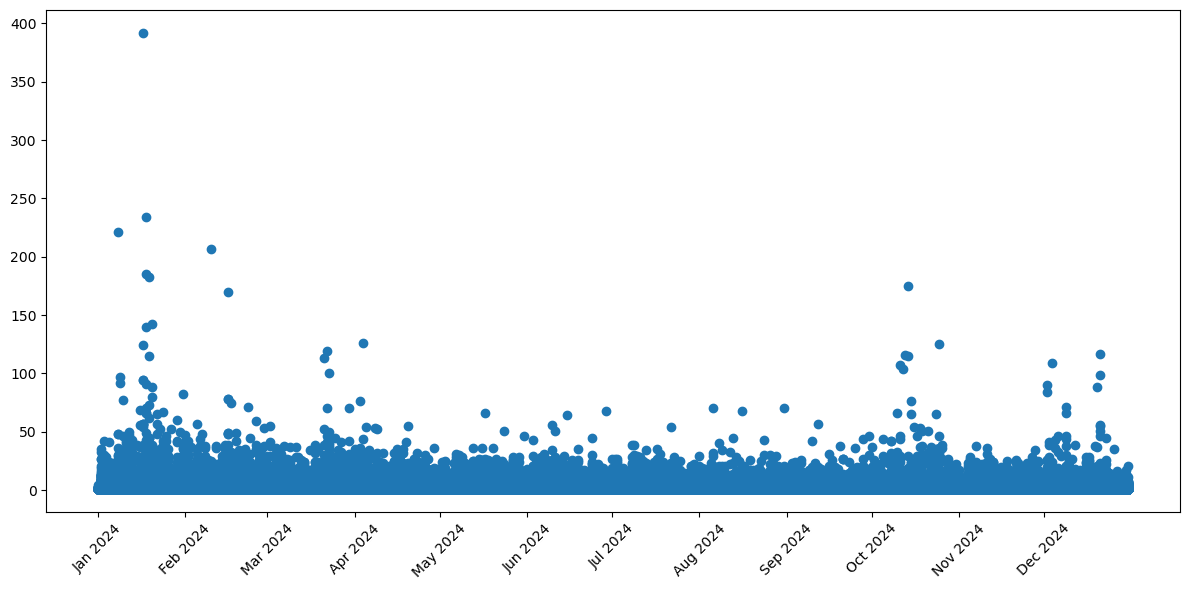

In [38]:
# Certifique-se de que a coluna está em formato datetime
df['DtCriacao'] = pd.to_datetime(df['DtCriacao'])

# Crie os ticks para o eixo x
meses = pd.date_range(start='2024-01-01', periods=12, freq='MS')  # Início de cada mês

plt.figure(figsize=(12, 6))
plt.scatter(df['DtCriacao'], df['NumQtdReclamacoesDia'])
plt.xticks(meses, [d.strftime('%b %Y') for d in meses], rotation=45)
plt.tight_layout()
#plt.ylim((0.0, 10.0))
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=40104a66-dba8-40d0-8fdb-2243b221c695' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>